# Оценки центрального положения
* Среднее(mean)
* Среднее взвешенное (weighted mean)
* Медиана (median)
* Среднее усеченное (trimmed mean)
* Робастный (robust)
* Выброс (outlier)

In [50]:
import numpy as np
import pandas as pd
import scipy.stats as sc

state = pd.read_csv('state.csv')

mean = state['Population'].mean()
trim_mean = sc.trim_mean(state['Population'], 0.1)
median = state['Population'].median()

print(f'Mean {mean}')
print(f'Trim mean {trim_mean}')
print(f'Median {median}')

Mean 6162876.3
Trim mean 4783697.125
Median 4436369.5


### Характеристики

* Mean - низкая устойчивость к выбрасам, исп когда данные семетричны и без выбрасов.
* Median - игнорирует выбросы если они не в центре, исп когда skewed данные.
*  Trim mean - меньше реаг к выбрасам.


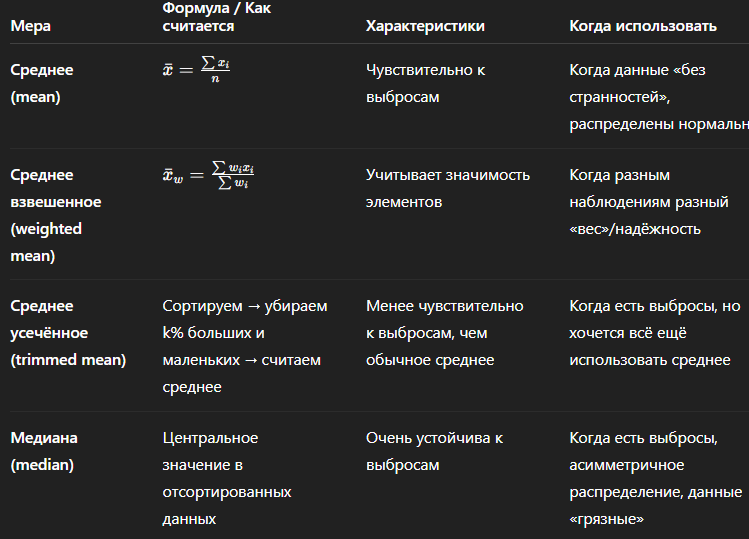

## Оценки вареабельности
* Отклонения (deviations)
* Дисперсия (variance)
* Стандартное отклонене (standard deviation)
* Среднее абсолютное отклонение (mean absolute deviation)
* Процентиль (percentile)
* Межквартальный размах (interquartile range)

Отклонения - разница между значениями и оценкой центрального положения 

In [51]:
nums = np.array([1,4,4])
deviations = nums - nums.mean()

print(f'Deviations {deviations}')
print(f"Sum of deviations = {deviations.sum()}")

Deviations [-2.  1.  1.]
Sum of deviations = 0.0


среднение самих отклонений мало, поэтому отрицательные отклонения нейтрализуют положительные. Фактически сумма отклонений от среднего как раз равно нулю.
Вместо этого нужно взять
* абсолютноые отклонения |xi​−xˉ|
* квадрат отклонений


In [52]:
mean_abs_dev = round(abs(deviations).mean(),2)
print(f"Mean absolute deviation = {mean_abs_dev}")

Mean absolute deviation = 1.33


Самыми известными оценками вариабельности явл дисперсия и стандартное отклонение, которые основаны на квадратических отклонениях. Дисперсия это среднее квадратических отклонений, стандартное отклонение это корень из диспресии.

In [53]:
variance = (deviations * deviations / len(nums)).sum()
standard_deviation = variance ** 0.5

# numpy
# mean = np.mean(nums)
# var = np.var(nums) генеральная совакупность
# std = np.std(nums) генеральная совакупность

# var = np.var(nums, ddof=1) выборочная совакупность
# std = np.std(nums, ddof=1) выборочная совакупность


print(f'Variance = {round(variance,2)}')
print(f'Standard deviation = {round(standard_deviation,2)}')

Variance = 2.0
Standard deviation = 1.41


Ни дисперсия и стандартное отклонение, ни среднее абсолютное отклонение ну устойчивы к выбрасам !!. Дисперсия и стандартное отклонения чувствительны к выборас больше всего, покольку они основаны на квадраттческих отклонениях.

Робастной оценкой вариабельности является Медианное абсолютное отклонение от медианы (median absolute deviation, MAD) и нужно умножить на 1.4826 если данные нармально распределены, для того что бы поставить метрику в ту же шкалу, что и стандартное отклонение.

In [59]:
mad = np.median(np.abs(nums - np.median(nums)))
mad_scaled = mad * 1.4826

print(f'Median absolute deviation = {mad}')
print(f'Median absolute deviation scaled = {mad_scaled}')

Median absolute deviation = 0.0
Median absolute deviation scaled = 0.0


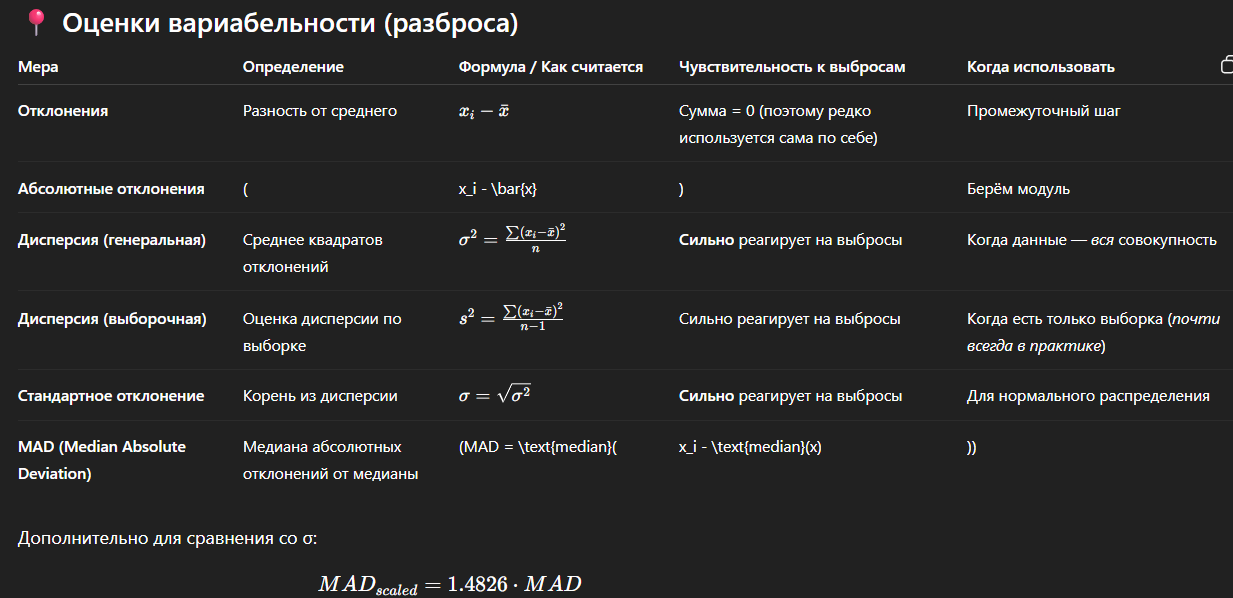
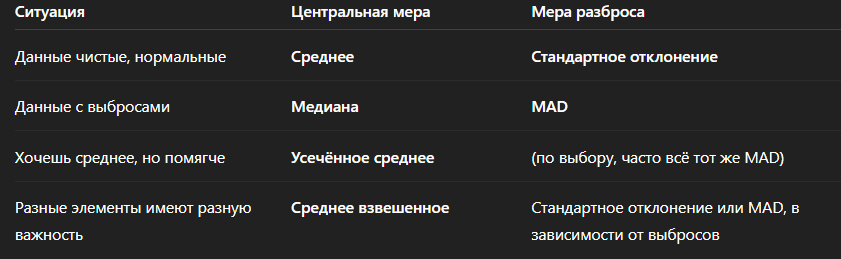